In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

In [3]:
X.shape

(506, 13)

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## SGD for linear regression

In [38]:
def predicted_y(weight,x,intercept):
    return weight@x+intercept
    

# linear loss
def loss(y,y_predicted):
    n=X.shape[0]
    s=(y-y_predicted)**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    n=X.shape[0]
    s=-x*(y-y_predicted)
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=X.shape[0]
    s=-(y-y_predicted)
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001
    
    for i in tqdm(range(epoch)):
        
        for j in range(n):
            random_index = random.randint(0,n-1)
            x_sample = x[random_index]
            y_sample = y[random_index]
            y_predicted = predicted_y(weight_vector,x_sample,intercept)
            # updation of weight and bias for every records
            weight_vector = weight_vector - learning_rate *dldw(x_sample,y_sample,y_predicted) 
            intercept = intercept - learning_rate * dldb(y_sample,y_predicted)
        linear_loss.append(loss(y_sample,y_predicted))    
        
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept,
    
    

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:24<00:00, 80.59it/s]


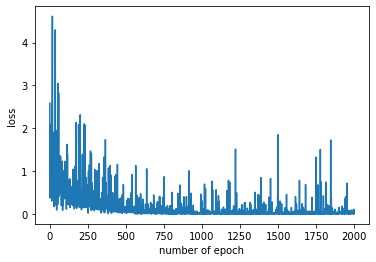

In [39]:
w,b=gradient_descent(X_transform,Y)


In [40]:
print("weight:",w)
print("bias:",b)

weight: [-0.52954651  0.7458838  -0.40947582  0.77208539 -0.42613122  3.05323906
 -0.15720171 -2.01078873  1.11189853 -1.28711519 -1.57598199  0.78135512
 -3.63182587]
bias: 22.111685828872197


# predict


In [28]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [29]:
y_pred=predict(X_transform)
y_pred

array([30.67181521, 24.998274  , 30.76008377, 29.07053505, 28.42317546,
       25.55647428, 23.02511034, 19.60994772, 11.48870389, 19.11166281,
       19.20913334, 21.71102179, 20.9422996 , 20.09134693, 19.74840803,
       19.77759213, 21.10205879, 17.31961974, 16.45312442, 18.68490558,
       12.70634453, 18.00686094, 16.20503502, 14.10145434, 16.07227912,
       13.72048395, 15.89511021, 15.14223449, 20.08484286, 21.43044514,
       11.76585967, 18.43552153,  9.13570525, 14.49561514, 13.98981513,
       23.53342471, 22.05588829, 22.99146478, 22.8343435 , 30.75789715,
       33.72991179, 28.12004284, 25.15405195, 24.57246408, 22.79034129,
       21.74242089, 20.09468886, 17.76512008,  8.70343095, 16.97385921,
       20.9779166 , 23.66223443, 27.53793391, 23.81039214, 16.39531335,
       30.73368563, 25.37298569, 32.40761933, 21.7517374 , 20.78360023,
       17.54484192, 18.08402437, 23.82268913, 22.67623967, 24.06892326,
       29.99340965, 25.0136912 , 21.50030395, 17.70739841, 21.14

In [30]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,30.7
1,21.6,25.0
2,34.7,30.8
3,33.4,29.1
4,36.2,28.4
...,...,...
501,22.4,23.8
502,20.6,22.5
503,23.9,27.9
504,22.0,26.4


# sklearn

In [31]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
model.intercept_

array([22.53049421])

In [33]:
model.coef_

array([-0.81589739,  0.91268359, -0.16276166,  0.71300785, -1.81615915,
        2.75186925, -0.04546646, -2.97644044,  1.80125191, -1.16941354,
       -1.98864102,  0.85320111, -3.6691723 ])

In [41]:
w

array([-0.52954651,  0.7458838 , -0.40947582,  0.77208539, -0.42613122,
        3.05323906, -0.15720171, -2.01078873,  1.11189853, -1.28711519,
       -1.57598199,  0.78135512, -3.63182587])

In [35]:
b

22.537054780990182